# IMDB Movie Reviews : Sentiment Analysis

## Introduction

Sentiment analysis of IMDB movie reviews is a fascinating area of natural language processing and machine learning. It involves the task of automatically determining the sentiment or emotional tone expressed in user-generated movie reviews on the Internet Movie Database (IMDB). IMDB is a popular platform where users share their thoughts and opinions about movies, making it a valuable source of sentiment-rich text data. IMDB movie review sentiment analysis is the process of classifying movie reviews as expressing positive or negative sentiment, based on the text content of the reviews.

## Import Libararies

In [18]:
import numpy as np
import pandas as pd
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.naive_bayes import MultinomialNB     #nb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,
confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pylab as plt
import graphviz

## 1. Load the data

In [2]:
#insert the code to load the data for processing.
df = pd.read_csv("./Data/IMDBDataset.csv")

## 2. Show data information

In [3]:
#look at the first five rows of the data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#create a copy to preprocess
data = df.copy(deep=True)

## 3. Text preprocessing

### (i) Tokenization

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk

[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\MEGHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |    

True

The sentiment column of the dataset is our target label. To proceed with, I have encoded the target labels using 1 and 0 for 'positive' and 'negative' respectively. We are looking at a binary text classification right now

In [6]:
#converting the label into binary :- 0 and 1
data.sentiment = [1 if s == 'positive' else 0 for s in data.sentiment]
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


I could notice many html tags and URLs in the dataset. Those are removed using appropriate regular expressions. All the data is converted into lowercase characters.

In [7]:
#removing html tags, URLs and converting the text to lowercase
def pre_process(x):
    x = re.sub('<.*?>', ' ', x)        #remove html tags
    x = re.sub('http\S+', ' ', x)      #remove URLs
    return x.lower().strip()          #convert everything to lowercase

data['review'] = data['review'].apply(lambda x: pre_process(x))

The movie review text is segmented into different tokens for easier analysis

In [8]:
# Tokenize the 'review' column
data['tokens'] = data['review'].apply(lambda x: word_tokenize(x))

### (ii) Stemming

In the further steps, I have removed the stop words and stemmed the tokens into their root words

In [9]:
# Remove stop words from the tokenized text
stop_words = set(nltk.corpus.stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda tokens: 
                                      [token for token in tokens if 
                                        token.lower() not in stop_words])

In [10]:
stemmer = PorterStemmer()
# Stem the tokens
data['stemmed_tokens'] = data['tokens'].apply(lambda tokens:
                                              [stemmer.stem(token) 
                                               for token in tokens])
# Combine the stemmed tokens into text sentences
data['stemmed_text'] = data['stemmed_tokens'].apply(lambda tokens:
                                                    ' '.join(tokens))
data.head()

,review,sentiment,tokens,stemmed_tokens,stemmed_text
0,one of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, '...",one review mention watch 1 oz episod 'll hook ...
1,a wonderful little production. the filming t...,1,"[wonderful, little, production, ., filming, te...","[wonder, littl, product, ., film, techniqu, un...",wonder littl product . film techniqu unassumin...
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,basically there's a family where a little boy ...,0,"[basically, 's, family, little, boy, (, jake, ...","[basic, 's, famili, littl, boy, (, jake, ), th...",basic 's famili littl boy ( jake ) think 's zo...
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, mattei, 's, ``, love, time, money, ''...","[petter, mattei, 's, ``, love, time, money, ''...",petter mattei 's `` love time money '' visual ...


### (iii) Create feature Vectors

To represent the text as feature vectors using techniques, I have used TF-IDF(Term Frequency-Inverse Document Frequency)

In [11]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the 'text' column to create a TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(data['stemmed_text'])

In [12]:
print(X_tfidf)

  (0, 61029)	0.048599092190116266
  (0, 17100)	0.0791174522035084
  (0, 68447)	0.049965151394151315
  (0, 67169)	0.062397998185731836
  (0, 72393)	0.04370887789331422
  (0, 70199)	0.07479506393006183
  (0, 14458)	0.06870504489246596
  (0, 7041)	0.0401425005032253
  (0, 42336)	0.039426899413053156
  (0, 22971)	0.04768688393425077
  (0, 61556)	0.06037212500393614
  (0, 64445)	0.055118526498085865
  (0, 37928)	0.04572636633436321
  (0, 8139)	0.08207380928791133
  (0, 69493)	0.03739950867989031
  (0, 13688)	0.05373886247543888
  (0, 43631)	0.054994649210817995
  (0, 41583)	0.06014419125588988
  (0, 73658)	0.026722926957703987
  (0, 27161)	0.04940481933324761
  (0, 48674)	0.05105018777851605
  (0, 36759)	0.04015948413998673
  (0, 33657)	0.17534418759111026
  (0, 46880)	0.10866017124335758
  (0, 62449)	0.07467025489991413
  :	:
  (49999, 74928)	0.09246885842894538
  (49999, 10836)	0.08406560731605507
  (49999, 63716)	0.08231159807757459
  (49999, 46480)	0.08650221861853048
  (49999, 28054)	0

## 4. Split the data for training and testing

We take 80% of the dataset for training and 20% for testing. 
Total Number of Records : 50000,
Training Set            : 40000,
Testing Set             : 10000

In [13]:
# Insert the code to split the data for training and testing set.
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

## 5. Build Machine learning models

### (i) Logistic Regression : 89.4%

In [14]:
log_reg = LogisticRegression(solver='liblinear', C=10.0, random_state=42)
log_reg.fit(X_train, y_train)
# Print the accuracy score on the training set
print('Accuracy on the training set: {:.4f}'.
      format(log_reg.score(X_train, y_train)))
# Print the accuracy score on the testing set
print('Accuracy on the testing set: {:.3f}'.
      format(log_reg.score(X_test, y_test)))

Accuracy on the training set: 0.9777
Accuracy on the testing set: 0.894


In [15]:
y_pred_lc = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lc))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



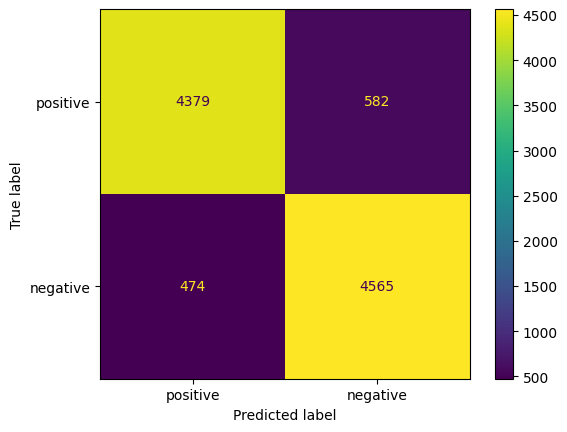

In [16]:
cm = confusion_matrix(y_test, y_pred_lc, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,display_labels=['positive','negative'])
disp.plot()
plt.show()

### (ii) Naive Bayes : 86.0%

In [22]:
nb_classifier = MultinomialNB()
# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)
# Print the accuracy score on the training set
print('Accuracy on the training set: {:.4f}'.
      format(nb_classifier.score(X_train, y_train)))
# Print the accuracy score on the testing set
print('Accuracy on the testing set: {:.3f}'.
      format(nb_classifier.score(X_test, y_test)))

Accuracy on the training set: 0.8972
Accuracy on the testing set: 0.860


In [23]:
y_pred_nb = nb_classifier.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



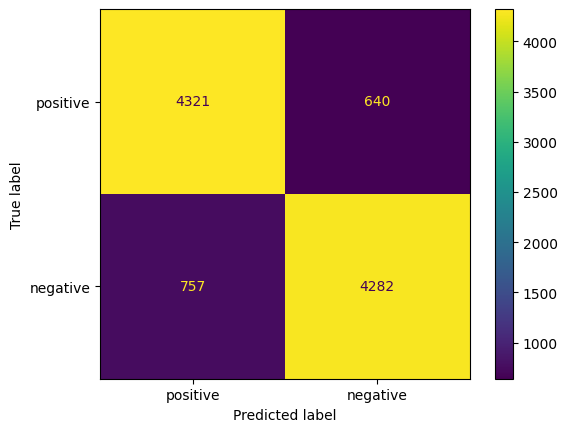

In [24]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,display_labels=['positive','negative'])
disp.plot()
plt.show()

## 6. Comparison of 2 models

- My initial curiosity was to compare a generative and discriminative model in this scenario. Going by that I trained and tested two models - Logistic Regression and Multinomial Naive Bayes. F1 score is usually considered as the most trusted metric for text classification. 
- Even though both the models performed decent on the problem, the F1 score of Logistic Regression is clearly larger than Naive Bayes. Logistic Regression has a remarkable 89% test accuracy and F1 score, when compared to the 86% of Naive Bayes model. The confusion matrix has also documented the number of misclassifications and right classifications by the two models. A comparison of the test accuracy is drawn by the graph below.

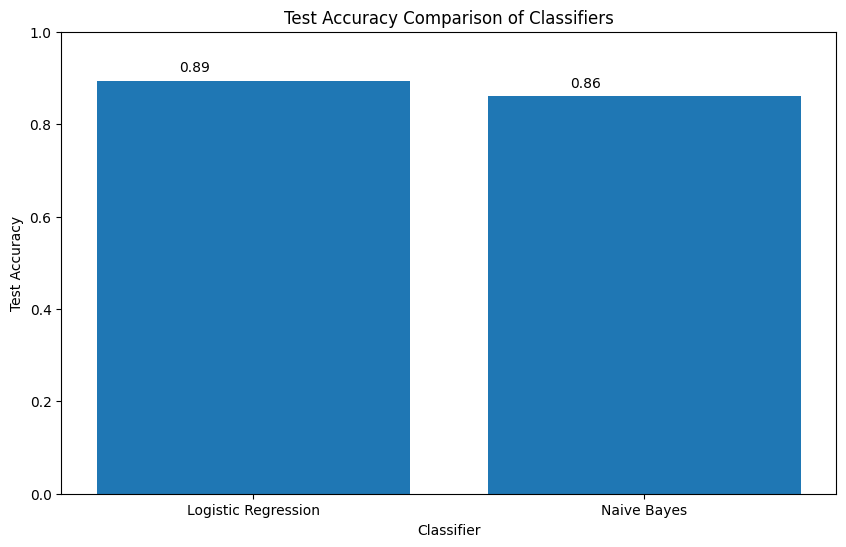

In [25]:
classifiers = [log_reg,nb_classifier]
classifier_names = ['Logistic Regression', 'Naive Bayes']
accuracies = [log_reg.score(X_test,y_test),
              nb_classifier.score(X_test,y_test)]

# Create a bar chart to compare test accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Classifiers')
plt.ylim(0,1)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, 
             bar.get_height() + 0.02,
             f'{accuracy:.2f}', ha='center')

plt.show()

## 7. Challenges Faced

- Punctuations and tags: There are lot of punctuation marks and html tags which do not impart any information to the classifier.

- Noise and Spelling Errors: Noise in text data, including spelling errors, typos, or non-standard language, can challenge sentiment analysis models. Preprocessing and cleaning are essential.
    
- Negation Handling: Negations in text, where a negative word is used to express a positive sentiment or vice versa, are tricky for models. For instance, "not bad" is a positive statement and it was present in a lot of records.


## 8. Conclusion

It has been concluded that among the two models that we have chosen, Logistic Regression works better for this text classification problem. However, we may be able to improve the performance using LSTM and other deep learning models. Movie review analysis has a wide variety of applications which includes building accurate movie recommendation systems, quality control of the movies, award predictions and box-office predictions. This is a strong area in today's digital era, which can be explored further for deeper and more meaningful analysis.